In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def find_neighbours(points, point, eps):
    neighbors = []
    for Pn in range(0, len(points)):
        distance = np.linalg.norm(points[point][0:-1] - points[Pn][0:-1])
        if distance < eps:
            neighbors.append(Pn)

    return neighbors

def grow_cluster(data, labels, point, current_cluster_label, eps, min_points):
    search_queue = [point]
    # For each point in the queue:
    #   - Determine whether it is a branch or a leaf
    #   - For branch points, add their unclaimed neighbors to the search queue
    i = 0
    while i < len(search_queue):
        point = search_queue[i]
        neighbours = find_neighbours(data, point, eps)
        
        # leaf point, move on
        if len(neighbours) < min_points:
            i += 1
            continue
                   
        for Pn in neighbours:
            if labels[Pn] == -1:
               # Noise, can't be branch
               labels[Pn] = current_cluster_label

            elif labels[Pn] == 0:
                labels[Pn] = current_cluster_label
                search_queue.append(Pn)
        i += 1

def DBSCAN(points, eps, MinPts):
    labels = [0]*len(points)
    current_cluster_label = 0

    # Pick a random point, check if it is valid seed point and grow a new cluster
    # out of it if it is.  
     
    for point in range(0, len(points)):    
        if not (labels[point] == 0):
           continue
        
        neighbours = find_neighbours(points, point, eps)

        if len(neighbours) < MinPts:
            labels[point] = -1 # noise
            continue

        current_cluster_label += 1         
        labels[point] = current_cluster_label
        grow_cluster(points, labels, point, current_cluster_label, eps, MinPts)
    
    return labels

In [3]:
import pandas as pd

columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name']
dataset = pd.read_csv("../datasets/iris.csv", delimiter=',', names=columns)
dataset.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa


In [4]:

df = pd.DataFrame(dataset[1:-1], columns = columns)
df = df.astype({'SepalLength':'float64', 'SepalWidth':'float64', 'PetalLength':'float64', 'PetalWidth':'float64'})

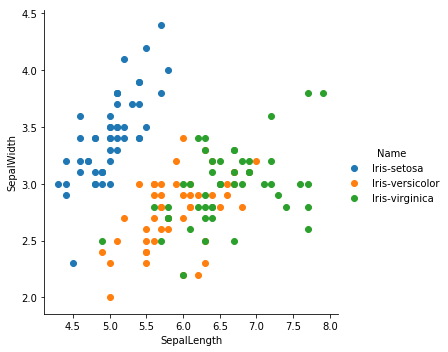

In [5]:
sns.FacetGrid(df, hue="Name", height=5) \
   .map(plt.scatter, "SepalLength", "SepalWidth") \
   .add_legend()

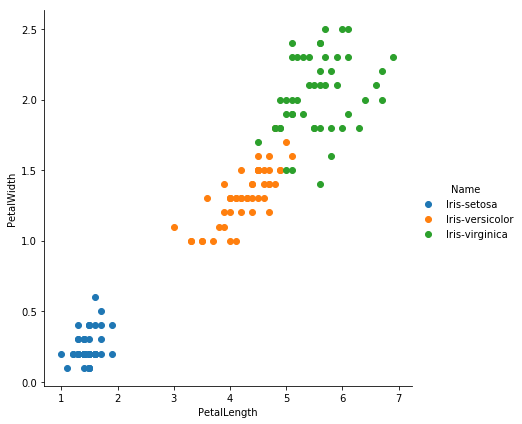

In [6]:
sns.FacetGrid(df, hue="Name", height = 6) \
    .map(plt.scatter, "PetalLength", "PetalWidth") \
    .add_legend()

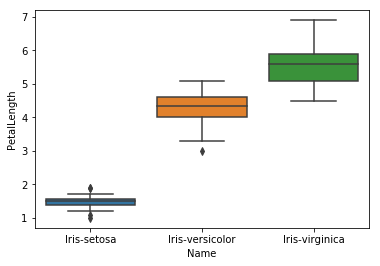

In [7]:
sns.boxplot(x="Name", y="PetalLength", data=df)

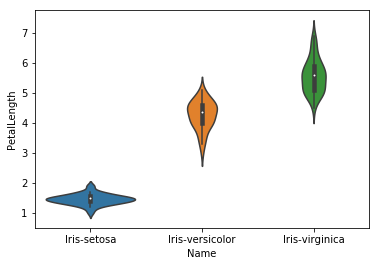

In [8]:
sns.violinplot(x="Name", y="PetalLength", data=df, size=6)

In [17]:
data = np.array(df)
cluster = DBSCAN(data, 0.7, 15)
print(cluster)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, -1, -1, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, -1, -1, -1, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [19]:
import random
data = np.array(df)
np.random.shuffle(data)
shuffled = DBSCAN(data, 1, 5)
print(shuffled)

[1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 1]


Text(0.5,1,"Model's classification")

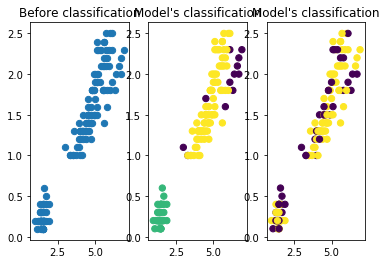

In [20]:
colormap = np.array(['red', 'lime', 'black'])
predictedY = cluster

plt.subplot(1, 3, 1)
plt.scatter(df['PetalLength'], df['PetalWidth'], s=40)
plt.title('Before classification')

plt.subplot(1, 3, 2)
plt.scatter(df['PetalLength'], df['PetalWidth'], c=predictedY, s=40)
plt.title("Model's classification")

plt.subplot(1, 3, 3)
plt.scatter(df['PetalLength'], df['PetalWidth'], c=shuffled, s=40)
plt.title("Model's classification")

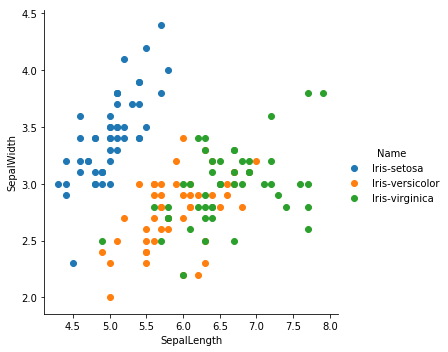

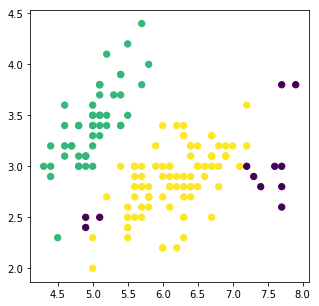

In [24]:

sns.FacetGrid(df, hue="Name", height=5) \
   .map(plt.scatter, "SepalLength", "SepalWidth") \
   .add_legend()

plt.figure(figsize=(5, 5))
plt.scatter(df['SepalLength'],df['SepalWidth'], s=40, c=predictedY, label=["Noise", "Class 1", "Class 2"])